In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Newzeleand_2019

In [5]:
Newzeleand_2019

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
26,26,TD Astle (NZ),3,1,0,10,10,10.00,16,62.50,...,96,3,2/52,32.00,5.64,34.0,0,0,0,0
42,42,TA Boult (NZ),20,8,4,24,10*,6.00,40,60.00,...,911,38,5/21,23.97,4.70,30.5,2,1,14,0
43,43,DAJ Bracewell (NZ),3,3,0,79,57,26.33,79,100.00,...,131,1,1/23,131.00,5.69,138.0,0,0,0,0
74,74,C de Grandhomme (NZ),16,11,1,241,64,24.10,220,109.54,...,395,11,3/26,35.90,4.38,49.0,0,0,5,0
97,97,LH Ferguson (NZ),17,5,2,18,12,6.00,31,58.06,...,830,35,4/37,23.71,5.19,27.3,2,0,6,0
117,117,MJ Guptill (NZ),20,20,2,650,138,36.11,668,97.30,...,-,-,-,-,-,-,-,-,14,0
129,129,MJ Henry (NZ),16,7,2,41,17*,8.20,39,105.12,...,736,24,4/35,30.66,5.08,36.1,2,0,5,0
180,180,TWM Latham (NZ),18,14,1,347,59,26.69,422,82.22,...,-,-,-,-,-,-,-,-,28,2
235,235,C Munro (NZ),14,14,1,324,87,24.92,318,101.88,...,80,0,-,-,5.71,-,0,0,6,0
245,245,JDS Neesham (NZ),18,13,3,436,97*,43.60,406,107.38,...,521,25,5/31,20.84,5.37,23.2,0,1,6,0


In [6]:
Newzeleand_2019=Newzeleand_2019.reset_index()

In [7]:
Newzeleand_2019

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,26,26,TD Astle (NZ),3,1,0,10,10,10.00,16,...,96,3,2/52,32.00,5.64,34.0,0,0,0,0
1,42,42,TA Boult (NZ),20,8,4,24,10*,6.00,40,...,911,38,5/21,23.97,4.70,30.5,2,1,14,0
2,43,43,DAJ Bracewell (NZ),3,3,0,79,57,26.33,79,...,131,1,1/23,131.00,5.69,138.0,0,0,0,0
3,74,74,C de Grandhomme (NZ),16,11,1,241,64,24.10,220,...,395,11,3/26,35.90,4.38,49.0,0,0,5,0
4,97,97,LH Ferguson (NZ),17,5,2,18,12,6.00,31,...,830,35,4/37,23.71,5.19,27.3,2,0,6,0
5,117,117,MJ Guptill (NZ),20,20,2,650,138,36.11,668,...,-,-,-,-,-,-,-,-,14,0
6,129,129,MJ Henry (NZ),16,7,2,41,17*,8.20,39,...,736,24,4/35,30.66,5.08,36.1,2,0,5,0
7,180,180,TWM Latham (NZ),18,14,1,347,59,26.69,422,...,-,-,-,-,-,-,-,-,28,2
8,235,235,C Munro (NZ),14,14,1,324,87,24.92,318,...,80,0,-,-,5.71,-,0,0,6,0
9,245,245,JDS Neesham (NZ),18,13,3,436,97*,43.60,406,...,521,25,5/31,20.84,5.37,23.2,0,1,6,0


In [8]:
Newzeleand_2019.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Newzeleand_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,TD Astle (NZ),3,1,0,10,10,10.00,16,62.50,0,...,96,3,2/52,32.00,5.64,34.0,0,0,0,0
1,TA Boult (NZ),20,8,4,24,10*,6.00,40,60.00,0,...,911,38,5/21,23.97,4.70,30.5,2,1,14,0
2,DAJ Bracewell (NZ),3,3,0,79,57,26.33,79,100.00,0,...,131,1,1/23,131.00,5.69,138.0,0,0,0,0
3,C de Grandhomme (NZ),16,11,1,241,64,24.10,220,109.54,0,...,395,11,3/26,35.90,4.38,49.0,0,0,5,0
4,LH Ferguson (NZ),17,5,2,18,12,6.00,31,58.06,0,...,830,35,4/37,23.71,5.19,27.3,2,0,6,0
5,MJ Guptill (NZ),20,20,2,650,138,36.11,668,97.30,3,...,-,-,-,-,-,-,-,-,14,0
6,MJ Henry (NZ),16,7,2,41,17*,8.20,39,105.12,0,...,736,24,4/35,30.66,5.08,36.1,2,0,5,0
7,TWM Latham (NZ),18,14,1,347,59,26.69,422,82.22,0,...,-,-,-,-,-,-,-,-,28,2
8,C Munro (NZ),14,14,1,324,87,24.92,318,101.88,0,...,80,0,-,-,5.71,-,0,0,6,0
9,JDS Neesham (NZ),18,13,3,436,97*,43.60,406,107.38,0,...,521,25,5/31,20.84,5.37,23.2,0,1,6,0


In [10]:
Newzeleand_2019_players =Newzeleand_2019.copy()

In [11]:
Newzeleand_2019_players.drop('Player',axis=1,inplace=True)

In [12]:
Newzeleand_2019_players.HS=Newzeleand_2019_players.HS.str.extract('(\d+)')
Newzeleand_2019_players['HS'].fillna(value=0, inplace=True)


In [13]:
Newzeleand_2019_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,3,1,0,10,10,10.00,16,62.50,0,0,...,96,3,2/52,32.00,5.64,34.0,0,0,0,0
1,20,8,4,24,10,6.00,40,60.00,0,0,...,911,38,5/21,23.97,4.70,30.5,2,1,14,0
2,3,3,0,79,57,26.33,79,100.00,0,1,...,131,1,1/23,131.00,5.69,138.0,0,0,0,0
3,16,11,1,241,64,24.10,220,109.54,0,2,...,395,11,3/26,35.90,4.38,49.0,0,0,5,0
4,17,5,2,18,12,6.00,31,58.06,0,0,...,830,35,4/37,23.71,5.19,27.3,2,0,6,0
5,20,20,2,650,138,36.11,668,97.30,3,1,...,-,-,-,-,-,-,-,-,14,0
6,16,7,2,41,17,8.20,39,105.12,0,0,...,736,24,4/35,30.66,5.08,36.1,2,0,5,0
7,18,14,1,347,59,26.69,422,82.22,0,3,...,-,-,-,-,-,-,-,-,28,2
8,14,14,1,324,87,24.92,318,101.88,0,2,...,80,0,-,-,5.71,-,0,0,6,0
9,18,13,3,436,97,43.60,406,107.38,0,2,...,521,25,5/31,20.84,5.37,23.2,0,1,6,0


In [14]:
Newzeleand_2019_players.replace("-",0,inplace=True)

In [15]:
Newzeleand_2019_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Newzeleand_2019_players_scaled = pd.DataFrame(scaler.fit_transform(Newzeleand_2019_players),columns=Newzeleand_2019_players.columns)
Newzeleand_2019_players_scaled.shape
Newzeleand_2019_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.631383,-1.444117,-1.30384,-0.869013,-1.000931,-0.811116,-0.811265,-1.243990,-0.487713,-0.760639,...,-0.624825,-0.629870,-0.543968,0.152160,0.768726,0.078083,-0.462910,-0.462910,-0.997142,-0.344124
1,0.987893,-0.328208,1.30384,-0.823677,-1.000931,-1.044156,-0.746869,-1.370587,-0.487713,-0.760639,...,2.843592,2.066098,2.270474,-0.105901,0.389934,-0.024026,2.160247,2.160247,1.121785,-0.344124
2,-1.631383,-1.125286,-1.30384,-0.645569,-0.065558,0.140270,-0.642225,0.654970,-0.487713,-0.281718,...,-0.624825,-0.514092,-0.704793,3.333732,0.788875,3.112167,-0.462910,-0.462910,-0.997142,-0.344124
3,0.371593,0.150038,-0.65192,-0.120961,0.073753,0.010350,-0.263898,1.138065,-0.487713,0.197203,...,0.675831,0.359203,0.099333,0.277494,0.260983,0.515691,-0.462910,-0.462910,-0.240383,-0.344124
4,0.525668,-0.806455,0.00000,-0.843107,-0.961128,-1.044156,-0.771017,-1.468826,-0.487713,-0.760639,...,0.459055,1.798155,2.029237,-0.114257,0.587389,-0.117382,2.160247,-0.462910,-0.089031,-0.344124


In [17]:
Newzeleand_2019_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,...,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01
mean,9.796086e-17,2.612289e-17,0.000000,-5.224579e-17,-3.918434e-17,1.044916e-16,-5.224579e-17,1.567374e-16,5.224579e-17,5.224579e-17,...,2.612289e-17,-9.796086e-17,-8.489941e-17,-2.612289e-17,1.828603e-16,0.000000,-7.183796e-17,-5.877651e-17,9.796086e-17,-1.959217e-17
std,1.030776e+00,1.030776e+00,1.030776,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,...,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00,1.030776,1.030776e+00,1.030776e+00,1.030776e+00,1.030776e+00
min,-1.631383e+00,-1.444117e+00,-1.303840,-8.690134e-01,-1.020832e+00,-1.393716e+00,-8.112650e-01,-1.539721e+00,-4.877131e-01,-7.606388e-01,...,-6.248252e-01,-9.474317e-01,-7.852058e-01,-8.762273e-01,-1.504030e+00,-0.913829,-4.629100e-01,-4.629100e-01,-9.971424e-01,-3.441236e-01
25%,-1.169158e+00,-9.658703e-01,-0.651920,-8.236769e-01,-9.611277e-01,-9.159844e-01,-7.710174e-01,-7.340557e-01,-4.877131e-01,-7.606388e-01,...,-6.248252e-01,-9.474317e-01,-7.852058e-01,-8.762273e-01,-1.504030e+00,-0.913829,-4.629100e-01,-4.629100e-01,-6.944385e-01,-3.441236e-01
50%,3.715927e-01,1.500381e-01,0.000000,-4.901296e-01,-6.555804e-02,1.034972e-02,-3.846406e-01,-2.814928e-02,-4.877131e-01,-2.817181e-01,...,-6.248252e-01,-5.140921e-01,-5.439678e-01,-1.059012e-01,4.463496e-01,-0.117382,-4.629100e-01,-4.629100e-01,-8.903057e-02,-3.441236e-01
75%,6.797428e-01,6.282845e-01,0.651920,5.105120e-01,7.305039e-01,7.100524e-01,2.781029e-01,7.501708e-01,-4.877131e-01,1.972027e-01,...,4.590552e-01,7.363076e-01,9.933326e-02,2.443932e-01,6.720133e-01,0.215200,-4.629100e-01,-4.629100e-01,-8.903057e-02,-3.441236e-01
max,1.141968e+00,1.584777e+00,2.607681,2.168533e+00,1.745483e+00,2.058189e+00,2.521235e+00,1.780166e+00,3.065625e+00,2.591806e+00,...,2.843592e+00,2.066098e+00,2.270474e+00,3.333732e+00,1.353034e+00,3.112167,2.160247e+00,2.160247e+00,3.240713e+00,3.555944e+00


In [18]:
X =  Newzeleand_2019_players_scaled.iloc[:,:].values

In [19]:
X

array([[-1.63138271e+00, -1.44411672e+00, -1.30384048e+00,
        -8.69013391e-01, -1.00093081e+00, -8.11116408e-01,
        -8.11264959e-01, -1.24398960e+00, -4.87713110e-01,
        -7.60638829e-01, -7.60638829e-01, -8.24180790e-01,
        -9.19126708e-01, -1.48048556e+00, -1.63138271e+00,
        -6.05743970e-01, -6.39600947e-01, -6.24825179e-01,
        -6.29869896e-01, -5.43967844e-01,  1.52159692e-01,
         7.68726305e-01,  7.80830358e-02, -4.62910050e-01,
        -4.62910050e-01, -9.97142398e-01, -3.44123601e-01],
       [ 9.87892866e-01, -3.28208345e-01,  1.30384048e+00,
        -8.23676875e-01, -1.00093081e+00, -1.04415644e+00,
        -7.46868830e-01, -1.37058688e+00, -4.87713110e-01,
        -7.60638829e-01, -7.60638829e-01, -7.88438256e-01,
        -7.51114299e-01, -1.34819513e+00,  9.87892866e-01,
         1.75993180e+00,  2.23299950e+00,  2.84359214e+00,
         2.06609779e+00,  2.27047448e+00, -1.05901179e-01,
         3.89933633e-01, -2.40255495e-02,  2.16024690e+

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Newzeleand_2019_players_scaled))

False

In [23]:
Newzeleand_2019_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.631383,-1.444117,-1.303840,-0.869013,-1.000931,-0.811116,-0.811265,-1.243990,-0.487713,-0.760639,...,-0.624825,-0.629870,-0.543968,0.152160,0.768726,0.078083,-0.462910,-0.462910,-0.997142,-0.344124
1,0.987893,-0.328208,1.303840,-0.823677,-1.000931,-1.044156,-0.746869,-1.370587,-0.487713,-0.760639,...,2.843592,2.066098,2.270474,-0.105901,0.389934,-0.024026,2.160247,2.160247,1.121785,-0.344124
2,-1.631383,-1.125286,-1.303840,-0.645569,-0.065558,0.140270,-0.642225,0.654970,-0.487713,-0.281718,...,-0.624825,-0.514092,-0.704793,3.333732,0.788875,3.112167,-0.462910,-0.462910,-0.997142,-0.344124
3,0.371593,0.150038,-0.651920,-0.120961,0.073753,0.010350,-0.263898,1.138065,-0.487713,0.197203,...,0.675831,0.359203,0.099333,0.277494,0.260983,0.515691,-0.462910,-0.462910,-0.240383,-0.344124
4,0.525668,-0.806455,0.000000,-0.843107,-0.961128,-1.044156,-0.771017,-1.468826,-0.487713,-0.760639,...,0.459055,1.798155,2.029237,-0.114257,0.587389,-0.117382,2.160247,-0.462910,-0.089031,-0.344124
5,0.987893,1.584777,0.000000,1.203513,1.546467,0.710052,0.938163,0.518245,3.065625,-0.281718,...,-0.624825,-0.947432,-0.785206,-0.876227,-1.504030,-0.913829,-0.462910,-0.462910,1.121785,-0.344124
6,0.371593,-0.487624,0.000000,-0.768625,-0.861620,-0.915984,-0.749552,0.914241,-0.487713,-0.760639,...,1.976488,1.487209,1.144698,0.109096,0.543063,0.139348,2.160247,-0.462910,-0.240383,-0.344124
7,0.679743,0.628285,-0.651920,0.222301,-0.025755,0.161243,0.278103,-0.245390,-0.487713,0.676123,...,-0.624825,-0.947432,-0.785206,-0.876227,-1.504030,-0.913829,-0.462910,-0.462910,3.240713,3.555944
8,0.063443,0.628285,-0.651920,0.147820,0.531488,0.058123,-0.000947,0.750171,-0.487713,0.197203,...,-0.624825,-0.682797,-0.785206,-0.876227,0.796934,-0.913829,-0.462910,-0.462910,-0.089031,-0.344124
9,0.679743,0.468869,0.651920,0.510512,0.730504,1.146420,0.235172,1.028685,-0.487713,0.197203,...,-0.191273,0.776003,1.225110,-0.206490,0.659924,-0.236995,-0.462910,2.160247,-0.089031,-0.344124


In [24]:
np.all(np.isfinite(Newzeleand_2019_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


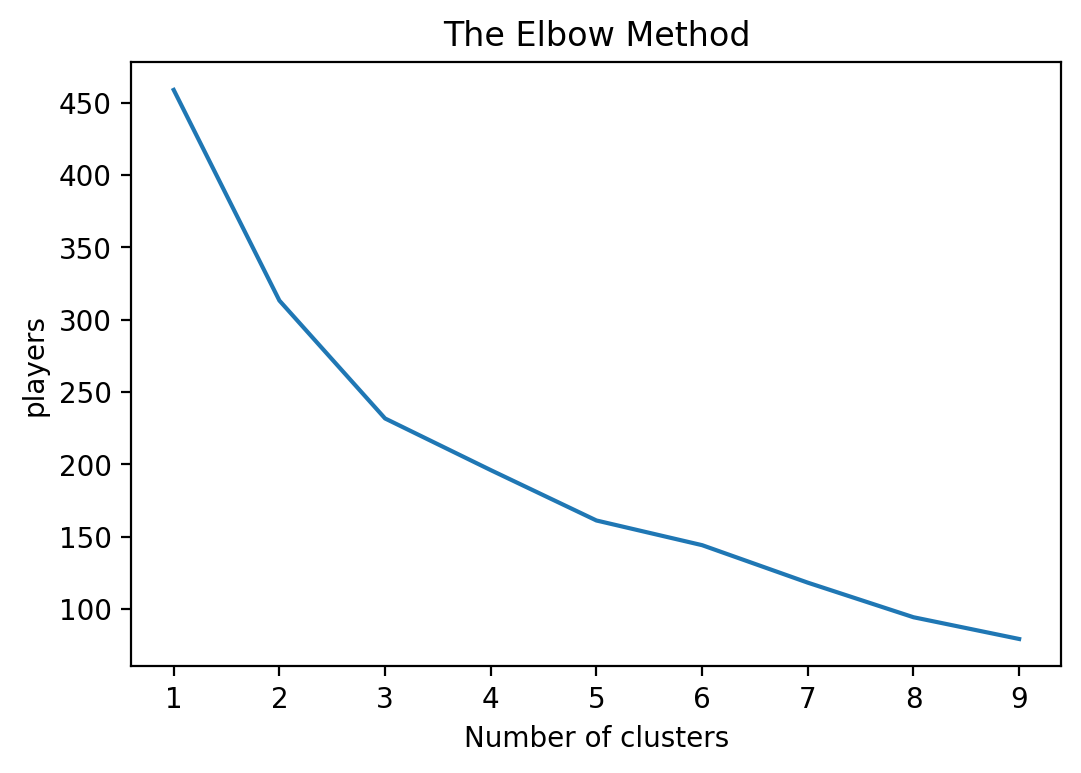

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0])

In [28]:
kmeans.cluster_centers_

array([[ 0.6797428 ,  1.10653099,  0.        ,  1.08963205,  1.09868254,
         0.92823616,  1.0830545 ,  0.03101385,  0.8941407 ,  0.9954039 ,
         0.43666303,  1.12974442,  0.62098704,  0.41016518,  0.6797428 ,
        -0.83767297, -0.81873136, -0.62482518, -0.85039895, -0.75840155,
        -0.61913058, -0.82771019, -0.59291624, -0.46291005, -0.46291005,
         0.56682797,  0.30588765],
       [ 0.55134694, -0.11565437,  0.65192024, -0.42266459, -0.46358901,
        -0.33474373, -0.44680076, -0.08207972, -0.48771311, -0.44135833,
        -0.04225771, -0.47866963, -0.02306053, -0.46350287,  0.55134694,
         1.29607381,  1.22552663,  1.07325413,  1.20382919,  1.13129544,
         0.11991547,  0.48127371,  0.20012711,  0.84866842,  0.4114756 ,
         0.01187074, -0.3441236 ],
       [-1.47730768, -1.18905195, -0.78230429, -0.80036095, -0.76211223,
        -0.71219091, -0.7635045 ,  0.06127904, -0.48771311, -0.66485468,
        -0.47328638, -0.78128975, -0.71751182,  0.0640

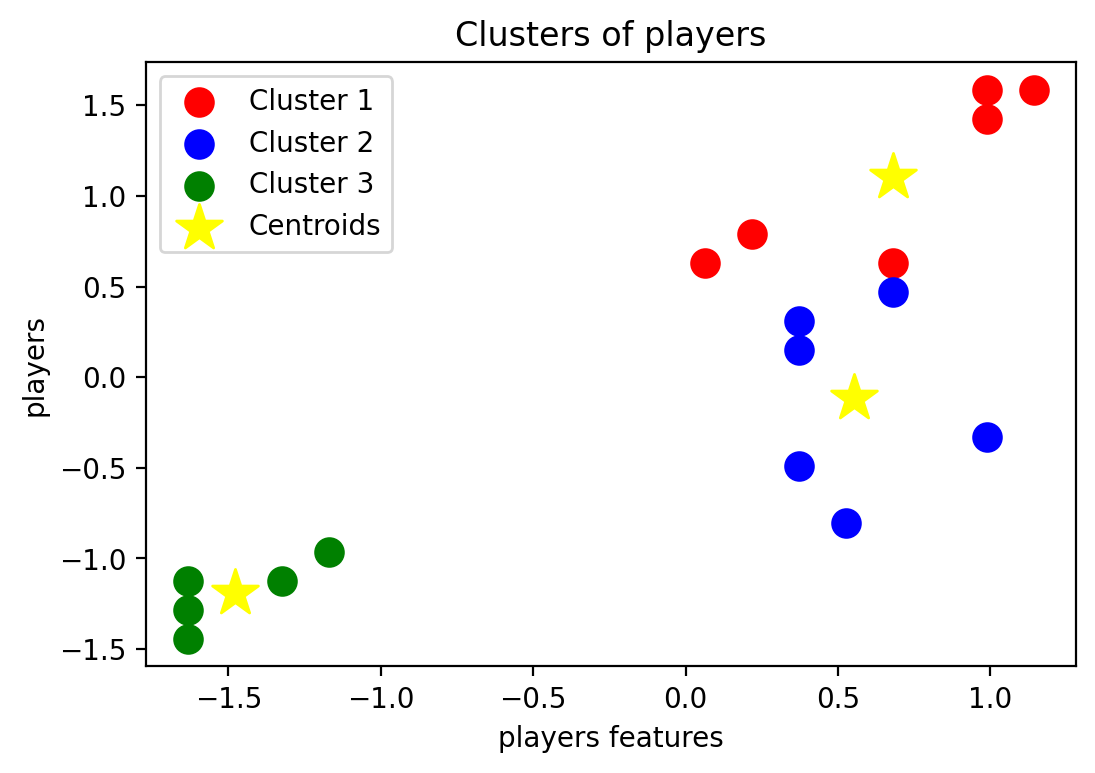

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Newzeleand_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,TD Astle (NZ),3,1,0,10,10,10.00,16,62.50,0,...,96,3,2/52,32.00,5.64,34.0,0,0,0,0
1,TA Boult (NZ),20,8,4,24,10*,6.00,40,60.00,0,...,911,38,5/21,23.97,4.70,30.5,2,1,14,0
2,DAJ Bracewell (NZ),3,3,0,79,57,26.33,79,100.00,0,...,131,1,1/23,131.00,5.69,138.0,0,0,0,0
3,C de Grandhomme (NZ),16,11,1,241,64,24.10,220,109.54,0,...,395,11,3/26,35.90,4.38,49.0,0,0,5,0
4,LH Ferguson (NZ),17,5,2,18,12,6.00,31,58.06,0,...,830,35,4/37,23.71,5.19,27.3,2,0,6,0
5,MJ Guptill (NZ),20,20,2,650,138,36.11,668,97.30,3,...,-,-,-,-,-,-,-,-,14,0
6,MJ Henry (NZ),16,7,2,41,17*,8.20,39,105.12,0,...,736,24,4/35,30.66,5.08,36.1,2,0,5,0
7,TWM Latham (NZ),18,14,1,347,59,26.69,422,82.22,0,...,-,-,-,-,-,-,-,-,28,2
8,C Munro (NZ),14,14,1,324,87,24.92,318,101.88,0,...,80,0,-,-,5.71,-,0,0,6,0
9,JDS Neesham (NZ),18,13,3,436,97*,43.60,406,107.38,0,...,521,25,5/31,20.84,5.37,23.2,0,1,6,0


In [31]:
Newzeleand_2019["cluster"] = y_kmeans

In [32]:
Newzeleand_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,TD Astle (NZ),3,1,0,10,10,10.00,16,62.50,0,...,3,2/52,32.00,5.64,34.0,0,0,0,0,2
1,TA Boult (NZ),20,8,4,24,10*,6.00,40,60.00,0,...,38,5/21,23.97,4.70,30.5,2,1,14,0,1
2,DAJ Bracewell (NZ),3,3,0,79,57,26.33,79,100.00,0,...,1,1/23,131.00,5.69,138.0,0,0,0,0,2
3,C de Grandhomme (NZ),16,11,1,241,64,24.10,220,109.54,0,...,11,3/26,35.90,4.38,49.0,0,0,5,0,1
4,LH Ferguson (NZ),17,5,2,18,12,6.00,31,58.06,0,...,35,4/37,23.71,5.19,27.3,2,0,6,0,1
5,MJ Guptill (NZ),20,20,2,650,138,36.11,668,97.30,3,...,-,-,-,-,-,-,-,14,0,0
6,MJ Henry (NZ),16,7,2,41,17*,8.20,39,105.12,0,...,24,4/35,30.66,5.08,36.1,2,0,5,0,1
7,TWM Latham (NZ),18,14,1,347,59,26.69,422,82.22,0,...,-,-,-,-,-,-,-,28,2,0
8,C Munro (NZ),14,14,1,324,87,24.92,318,101.88,0,...,0,-,-,5.71,-,0,0,6,0,0
9,JDS Neesham (NZ),18,13,3,436,97*,43.60,406,107.38,0,...,25,5/31,20.84,5.37,23.2,0,1,6,0,1


In [33]:
Newzeleand_2019['cluster'].value_counts()

0    6
1    6
2    5
Name: cluster, dtype: int64

In [34]:
Newzeleand_Cluster_2019 = np.array([6,6,5])

In [35]:
Newzeleand_Cluster_2019

array([6, 6, 5])

In [36]:
%store Newzeleand_Cluster_2019

Stored 'Newzeleand_Cluster_2019' (ndarray)


In [37]:
Newzeleand_2019_players_scaled.insert(0, 'Player', Newzeleand_2019.Player)

In [38]:
Newzeleand_2019_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,TD Astle (NZ),-1.631383,-1.444117,-1.303840,-0.869013,-1.000931,-0.811116,-0.811265,-1.243990,-0.487713,...,-0.624825,-0.629870,-0.543968,0.152160,0.768726,0.078083,-0.462910,-0.462910,-0.997142,-0.344124
1,TA Boult (NZ),0.987893,-0.328208,1.303840,-0.823677,-1.000931,-1.044156,-0.746869,-1.370587,-0.487713,...,2.843592,2.066098,2.270474,-0.105901,0.389934,-0.024026,2.160247,2.160247,1.121785,-0.344124
2,DAJ Bracewell (NZ),-1.631383,-1.125286,-1.303840,-0.645569,-0.065558,0.140270,-0.642225,0.654970,-0.487713,...,-0.624825,-0.514092,-0.704793,3.333732,0.788875,3.112167,-0.462910,-0.462910,-0.997142,-0.344124
3,C de Grandhomme (NZ),0.371593,0.150038,-0.651920,-0.120961,0.073753,0.010350,-0.263898,1.138065,-0.487713,...,0.675831,0.359203,0.099333,0.277494,0.260983,0.515691,-0.462910,-0.462910,-0.240383,-0.344124
4,LH Ferguson (NZ),0.525668,-0.806455,0.000000,-0.843107,-0.961128,-1.044156,-0.771017,-1.468826,-0.487713,...,0.459055,1.798155,2.029237,-0.114257,0.587389,-0.117382,2.160247,-0.462910,-0.089031,-0.344124
5,MJ Guptill (NZ),0.987893,1.584777,0.000000,1.203513,1.546467,0.710052,0.938163,0.518245,3.065625,...,-0.624825,-0.947432,-0.785206,-0.876227,-1.504030,-0.913829,-0.462910,-0.462910,1.121785,-0.344124
6,MJ Henry (NZ),0.371593,-0.487624,0.000000,-0.768625,-0.861620,-0.915984,-0.749552,0.914241,-0.487713,...,1.976488,1.487209,1.144698,0.109096,0.543063,0.139348,2.160247,-0.462910,-0.240383,-0.344124
7,TWM Latham (NZ),0.679743,0.628285,-0.651920,0.222301,-0.025755,0.161243,0.278103,-0.245390,-0.487713,...,-0.624825,-0.947432,-0.785206,-0.876227,-1.504030,-0.913829,-0.462910,-0.462910,3.240713,3.555944
8,C Munro (NZ),0.063443,0.628285,-0.651920,0.147820,0.531488,0.058123,-0.000947,0.750171,-0.487713,...,-0.624825,-0.682797,-0.785206,-0.876227,0.796934,-0.913829,-0.462910,-0.462910,-0.089031,-0.344124
9,JDS Neesham (NZ),0.679743,0.468869,0.651920,0.510512,0.730504,1.146420,0.235172,1.028685,-0.487713,...,-0.191273,0.776003,1.225110,-0.206490,0.659924,-0.236995,-0.462910,2.160247,-0.089031,-0.344124


In [39]:
Newzeleand_2019_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,TD Astle (NZ),-0.811116,0.152160
1,TA Boult (NZ),-1.044156,-0.105901
2,DAJ Bracewell (NZ),0.140270,3.333732
3,C de Grandhomme (NZ),0.010350,0.277494
4,LH Ferguson (NZ),-1.044156,-0.114257
5,MJ Guptill (NZ),0.710052,-0.876227
6,MJ Henry (NZ),-0.915984,0.109096
7,TWM Latham (NZ),0.161243,-0.876227
8,C Munro (NZ),0.058123,-0.876227
9,JDS Neesham (NZ),1.146420,-0.206490


In [40]:
Newzeleand_2019_Ave=Newzeleand_2019_players_scaled.mean()

In [41]:
Newzeleand_2019_Ave

Mat_x           9.796086e-17
Inns_x          2.612289e-17
NO              0.000000e+00
Runs_x         -5.224579e-17
HS             -3.918434e-17
Ave_x           1.044916e-16
BF             -5.224579e-17
SR_x            1.567374e-16
100             5.224579e-17
50              5.224579e-17
0               0.000000e+00
4s              2.612289e-17
6s              1.632681e-18
Unnamed: 0_y    6.530724e-17
Mat_y           9.796086e-17
Inns_y          8.163405e-17
Overs          -9.143013e-17
Mdns            2.612289e-17
Runs_y         -9.796086e-17
Wkts           -8.489941e-17
Ave_y          -2.612289e-17
Econ            1.828603e-16
SR_y            0.000000e+00
4              -7.183796e-17
5              -5.877651e-17
Ct              9.796086e-17
St             -1.959217e-17
dtype: float64

In [42]:
Newzeleand_Ave_2019 =Newzeleand_2019_Ave[['Ave_x','Ave_y']]

In [43]:
Newzeleand_Ave_2019

Ave_x    1.044916e-16
Ave_y   -2.612289e-17
dtype: float64

In [44]:
Newzeleand_Ave_2019 = np.array([Newzeleand_Ave_2019.Ave_x, Newzeleand_Ave_2019.Ave_y])

In [45]:
Newzeleand_Ave_2019

array([ 1.04491579e-16, -2.61228947e-17])

In [46]:
%store Newzeleand_Ave_2019

Stored 'Newzeleand_Ave_2019' (ndarray)


In [47]:
Newzeleand_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,TD Astle (NZ),3,1,0,10,10,10.00,16,62.50,0,...,3,2/52,32.00,5.64,34.0,0,0,0,0,2
1,TA Boult (NZ),20,8,4,24,10*,6.00,40,60.00,0,...,38,5/21,23.97,4.70,30.5,2,1,14,0,1
2,DAJ Bracewell (NZ),3,3,0,79,57,26.33,79,100.00,0,...,1,1/23,131.00,5.69,138.0,0,0,0,0,2
3,C de Grandhomme (NZ),16,11,1,241,64,24.10,220,109.54,0,...,11,3/26,35.90,4.38,49.0,0,0,5,0,1
4,LH Ferguson (NZ),17,5,2,18,12,6.00,31,58.06,0,...,35,4/37,23.71,5.19,27.3,2,0,6,0,1
5,MJ Guptill (NZ),20,20,2,650,138,36.11,668,97.30,3,...,-,-,-,-,-,-,-,14,0,0
6,MJ Henry (NZ),16,7,2,41,17*,8.20,39,105.12,0,...,24,4/35,30.66,5.08,36.1,2,0,5,0,1
7,TWM Latham (NZ),18,14,1,347,59,26.69,422,82.22,0,...,-,-,-,-,-,-,-,28,2,0
8,C Munro (NZ),14,14,1,324,87,24.92,318,101.88,0,...,0,-,-,5.71,-,0,0,6,0,0
9,JDS Neesham (NZ),18,13,3,436,97*,43.60,406,107.38,0,...,25,5/31,20.84,5.37,23.2,0,1,6,0,1
